In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


LOCATION_PROCESSED = 'data_processed'
LOCATION_SURVEY = f'{LOCATION_PROCESSED}/survey_responses.csv'
LOCATION_QUESTIONS = f'{LOCATION_PROCESSED}/questions_processed.csv'


In [2]:
# load the survey data
survey = pd.read_csv(LOCATION_SURVEY, index_col=0)
survey.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,18-24,Male,Denmark,Undergraduate,Finance / Accounting,Once every three months,Strongly disagree,Agree,Neither agree nor disagree,Food and Beverages,...,No,2.0,Maybe,3.0,No,1.0,Yes,4.0,No,3.0
1,25-34,Female,United States,Part-time Employee,Other,Once every three months,Agree,Strongly agree,Agree,Toys and Games|Books and Media,...,Maybe,3.0,Yes,5.0,Yes,1.0,Yes,1.0,No,3.0
2,25-34,Male,Denmark,Unemployed,Technology / IT,Rarely / Never,Strongly disagree,Strongly disagree,Strongly disagree,NaN,...,Yes,5.0,Maybe,3.0,Yes,5.0,No,3.0,No,3.0
3,25-34,Male,Denmark,Graduate / Postgraduate,Technology / IT,Once a month,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Electronics and Gadgets|Toys and Games|Health ...,...,No,3.0,Maybe,3.0,Maybe,2.0,Maybe,2.0,No,3.0
4,25-34,Male,Finland,Undergraduate,Finance / Accounting,Once every three months,Disagree,Agree,Agree,Electronics and Gadgets|Clothing and Accessories,...,Yes,4.0,No,3.0,Yes,4.0,Maybe,3.0,No,3.0


In [3]:
# load questions
df_questions = pd.read_csv(LOCATION_QUESTIONS, index_col=0)
df_questions.tail()

,title,type,options,required,placeholder,subtitle,shuffle,strategy,taxonomicalParentIndex,shortStrategy,example,page,strategy_index,taxonomicalParent
id,,,,,,,,,,,,,,
57,How effective do you perceive this strategy to...,RangeInput,"['1', '2', '3', '4', '5']",False,NaN,Rate on scale from 1 (Not effective) to 5 (Ver...,NaN,"Reflect on time, space and environmental cost ...",3.0,Eco Impact Check,"Before completing a purchase, you reflect on t...",3,19.0,Mindful Awareness
58,Have you tried this strategy before?,RadioInput,"['Yes', 'No', 'Maybe']",True,NaN,NaN,NaN,Remind yourself of the corporations agenda and...,3.0,Corporate Reflection,"Before completing a purchase, you zoom out of ...",3,20.0,Mindful Awareness
59,How effective do you perceive this strategy to...,RangeInput,"['1', '2', '3', '4', '5']",False,NaN,Rate on scale from 1 (Not effective) to 5 (Ver...,NaN,Remind yourself of the corporations agenda and...,3.0,Corporate Reflection,"Before completing a purchase, you zoom out of ...",3,20.0,Mindful Awareness
60,Have you tried this strategy before?,RadioInput,"['Yes', 'No', 'Maybe']",True,NaN,NaN,NaN,"When purchasing, ask yourself which feelings y...",3.0,Emotionally Self-aware,"You are in the midst of ordering clothes, but ...",3,21.0,Mindful Awareness
61,How effective do you perceive this strategy to...,RangeInput,"['1', '2', '3', '4', '5']",False,NaN,Rate on scale from 1 (Not effective) to 5 (Ver...,NaN,"When purchasing, ask yourself which feelings y...",3.0,Emotionally Self-aware,"You are in the midst of ordering clothes, but ...",3,21.0,Mindful Awareness


In [4]:
# page 1
AGE_COLUMN = "1"
GENDER_COLUMN = "2"
COUNTRY_COLUMN = "3"
EMPLOYMENT_COLUMN = "4"
FIELD_COLUMN = "5"

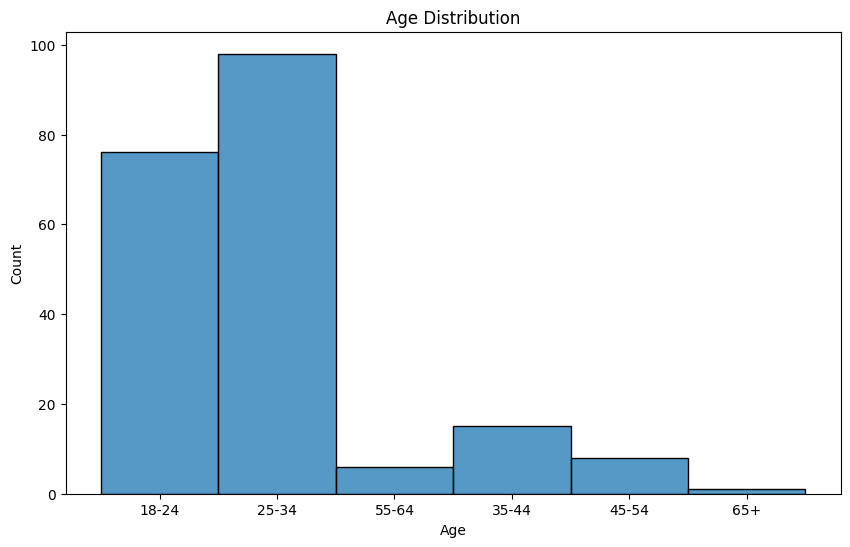

{'18-24': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55-64': 4, '65+': 5}


age
0.333333    98
0.166667    76
0.500000    15
0.666667     8
0.833333     6
1.000000     1
Name: count, dtype: int64

In [5]:
BINS = ["18-24","25-34","35-44","45-54","55-64","65+"] 

# sort the bins in order

plt.figure(figsize=(10,6))
sns.histplot(survey[AGE_COLUMN], bins=BINS, kde=False)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
# save the plot
plt.savefig(f"{LOCATION_PROCESSED}/age_distribution.png")
plt.show()

# convert column to a linear scale
bin_indexes = {bin: i for i, bin in enumerate(BINS)}
print(bin_indexes)

# convert to a scale from 0 to 1
survey["age"] = survey[AGE_COLUMN].apply(lambda x: (bin_indexes[x] + 1) / (len(BINS)))
survey.value_counts("age")

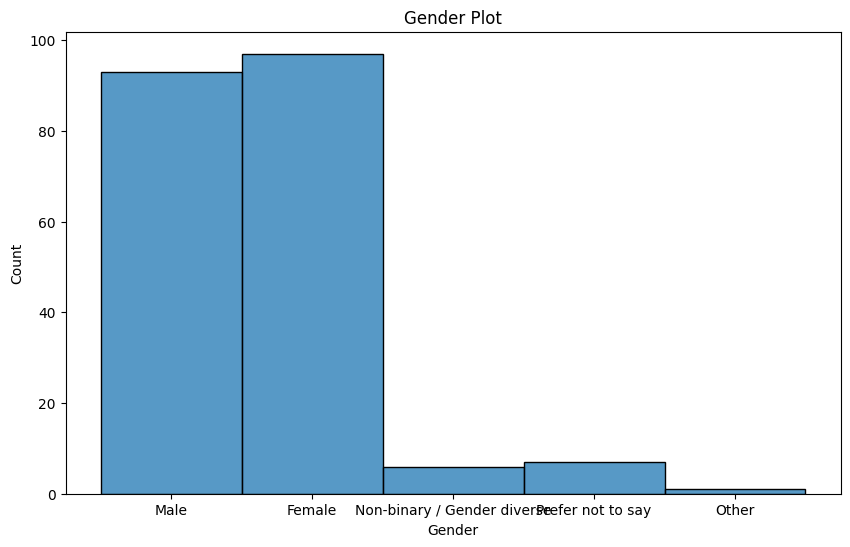

In [6]:
GENDERS_BINS = ["Male","Female","Non-binary / Gender diverse","Other","Prefer not to say"]
# plot gender histogram
plt.figure(figsize=(10,6))
sns.histplot(survey[GENDER_COLUMN], bins=GENDERS_BINS, kde=False)
plt.title("Gender Plot")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig(f"{LOCATION_PROCESSED}/gender_distribution.png")
plt.show()

In [7]:
gender_map = {
    "Female": 0.5,
    "Male": -0.5,
}

# map gender categories to above values, map all other categories to 0
survey["femaleness"] = survey[GENDER_COLUMN].map(lambda x: gender_map[x] if x in gender_map else 0)
survey["femaleness"].value_counts()

femaleness
 0.5    97
-0.5    93
 0.0    14
Name: count, dtype: int64

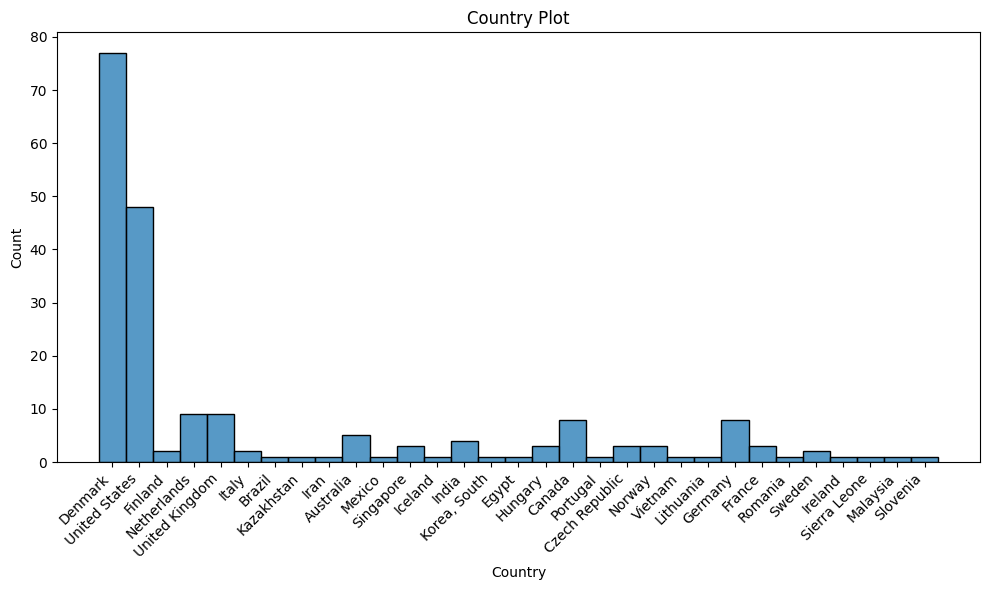

In [8]:
# plot country histogram
plt.figure(figsize=(10,6))
sns.histplot(survey[COUNTRY_COLUMN], kde=False)
plt.title("Country Plot")
plt.xlabel("Country")
# set x labels to be vertical
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
# full width
plt.tight_layout()

plt.savefig(f"{LOCATION_PROCESSED}/country_distribution.png")
plt.show()


In [9]:
# map country to continent
country_continent = {
    "Denmark": "Europe",
    "United States": "North America",
    "Finland": "Europe",
    "Netherlands": "Europe",
    "United Kingdom": "Europe",
    "Brazil": "South America",
    "Kazakhstan": "Asia",
    "Iran": "Asia",
    "Australia": "Australia",
    "Mexico": "North America",
    "Singapore": "Asia",
    "Italy": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Korea, South": "Asia",
    "Egypt": "Africa",
    "Hungary": "Europe",
    "Canada": "North America",
    "Portugal": "Europe",
    "Czech Republic": "Europe",
    "Norway": "Europe",
    "Vietnam": "Asia",
    "Lithuania": "Europe",
    "Germany": "Europe",
    "France": "Europe",
    "Romania": "Europe",
    "Sweden": "Europe",
    "Ireland": "Europe",
    "Sierra Leone": "Africa",
    "Malaysia": "Asia",
    "Slovenia": "Europe",
}

# map country to new continent column
survey["continent"] = survey[COUNTRY_COLUMN].map(country_continent)
# print(survey["continent"].value_counts())

continents_used = ["Europe"]
# map continents not in the list to "Other"
survey["european"] = survey["continent"].apply(lambda x: 1 if x in continents_used else 0)
print(survey["european"].value_counts())

# remove continent column
survey.drop(columns=["continent"], inplace=True)

european
1    127
0     77
Name: count, dtype: int64


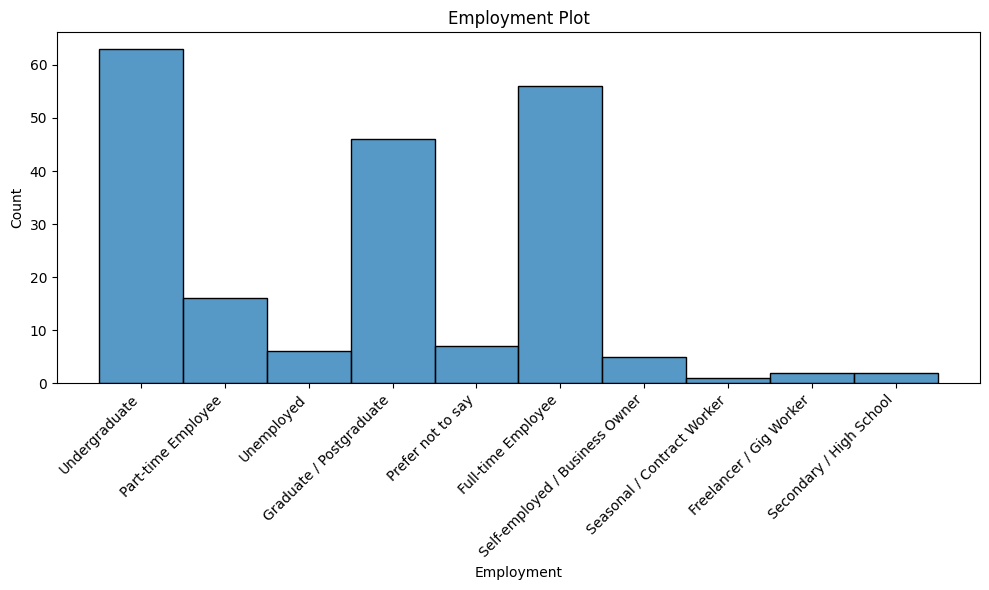

In [10]:
# plot employment histogram
plt.figure(figsize=(10,6))
sns.histplot(survey[EMPLOYMENT_COLUMN], kde=False)
plt.title("Employment Plot")
plt.xlabel("Employment")
plt.ylabel("Count")
# full width
# x labels vertical
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{LOCATION_PROCESSED}/employment_distribution.png")
plt.show()

# survey["employment"] = survey[EMPLOYMENT_COLUMN]
# survey = pd.get_dummies(survey, columns=["employment"])
# survey

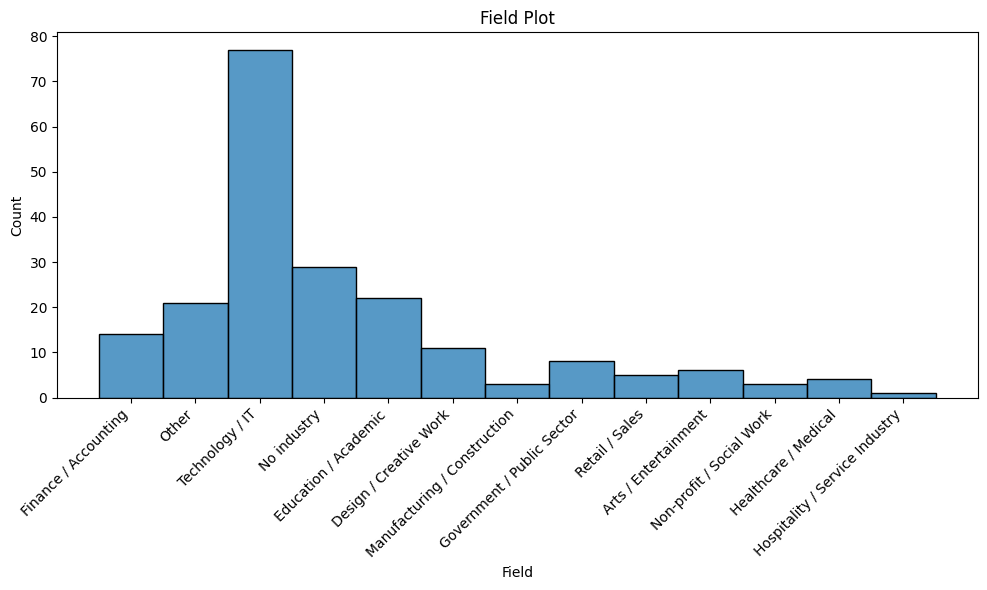

field_technology
0    127
1     77
Name: count, dtype: int64


In [11]:
fields_used = ["Technology / IT"]
# plot field histogram
plt.figure(figsize=(10,6))
sns.histplot(survey[FIELD_COLUMN], kde=False)
plt.title("Field Plot")
plt.xlabel("Field")
plt.ylabel("Count")
# full width
# x labels vertical
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{LOCATION_PROCESSED}/field_distribution.png")
plt.show()

# one hot encode the field column in new columns
survey["field_technology"] = survey[FIELD_COLUMN].apply(lambda x: 1 if x in fields_used else 0)
# survey = pd.get_dummies(survey, columns=["field"])
print(survey["field_technology"].value_counts())

In [12]:
# page 2
page2_questions = df_questions[df_questions["page"] == 2]

columns_to_display = ["title", "options", "required"]
page2_questions[columns_to_display]
for index, row in page2_questions.iterrows():
    print(f"{row['title']}: ({row['options']})\n")

page2_questions


How often do you purchase products online on impulse?: (['Daily', 'Multiple times a week', 'Once a week', '2-3 times a month', 'Once a month', 'Once every three months', 'Rarely / Never'])

I find it hard to resist online impulse purchases: (['Strongly agree', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Strongly disagree'])

I would like to decrease my online impulse purchasing: (['Strongly agree', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Strongly disagree'])

I often regret my impulse purchases: (['Strongly agree', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Strongly disagree'])

What categories of products are you likely to purchase on impulse online?: (['Electronics and Gadgets', 'Clothing and Accessories', 'Health and Beauty Products', 'Home and Garden', 'Food and Beverages', 'Toys and Games', 'Books and Media', 'Sports and Fitness Equipment', 'Travel and Experiences'])

I am interested in trying tools that help reduce online impulse purchases: (['Strongl

,title,type,options,required,placeholder,subtitle,shuffle,strategy,taxonomicalParentIndex,shortStrategy,example,page,strategy_index,taxonomicalParent
id,,,,,,,,,,,,,,
6,How often do you purchase products online on i...,RadioInput,"['Daily', 'Multiple times a week', 'Once a wee...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
7,I find it hard to resist online impulse purchases,RadioInput,"['Strongly agree', 'Agree', 'Neither agree nor...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
8,I would like to decrease my online impulse pur...,RadioInput,"['Strongly agree', 'Agree', 'Neither agree nor...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
9,I often regret my impulse purchases,RadioInput,"['Strongly agree', 'Agree', 'Neither agree nor...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
10,What categories of products are you likely to ...,SelectInput,"['Electronics and Gadgets', 'Clothing and Acce...",False,NaN,You can choose multiple options. If you do not...,0.0,NaN,NaN,NaN,NaN,2,NaN,NaN
11,I am interested in trying tools that help redu...,RadioInput,"['Strongly agree', 'Agree', 'Neither agree nor...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
12,Can you think of any features that you would f...,TextFieldInput,NaN,False,Enter your suggestions here,Optional,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


In [13]:
import json


def convert_options_to_list(options):
    json_options = json.loads(options.replace("'", "\""))
    return json_options

['Rarely / Never', 'Once every three months', 'Once a month', '2-3 times a month', 'Once a week', 'Multiple times a week', 'Daily']


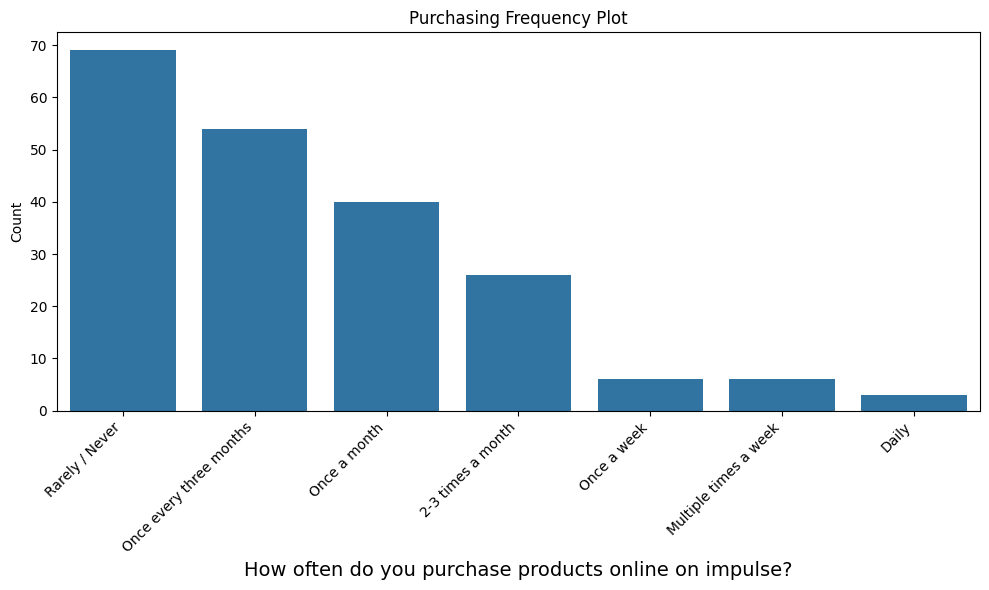

purchasing_frequency
0.0                    69
0.16666666666666666    54
0.3333333333333333     40
0.5                    26
0.6666666666666666      6
0.8333333333333334      6
1.0                     3
Name: count, dtype: int64

In [14]:
# purchasing frequency

PURCHASING_FREQUENCY_COLUMN = 6
question = df_questions.loc[PURCHASING_FREQUENCY_COLUMN]
options = question["options"]
order = convert_options_to_list(options)
# flip the order
order = order[::-1]
print(order)

# Ensure the survey data is categorical with the same order
survey[str(PURCHASING_FREQUENCY_COLUMN)] = pd.Categorical(
    survey[str(PURCHASING_FREQUENCY_COLUMN)], categories=order, ordered=True
)

# Plot purchasing frequency count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=survey, x=str(PURCHASING_FREQUENCY_COLUMN), order=order)
plt.title("Purchasing Frequency Plot")
plt.xlabel(question["title"], fontsize=14)
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{LOCATION_PROCESSED}/purchasing_frequency_distribution.png")
plt.show()

survey

# convert the column to a linear scale
purchase_frequency_order = {value: i for i, value in enumerate(order)}
survey["purchasing_frequency"] = survey[str(PURCHASING_FREQUENCY_COLUMN)].apply(
    lambda x: purchase_frequency_order[x] / (len(order) - 1)
)

survey["purchasing_frequency"].value_counts()

['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']


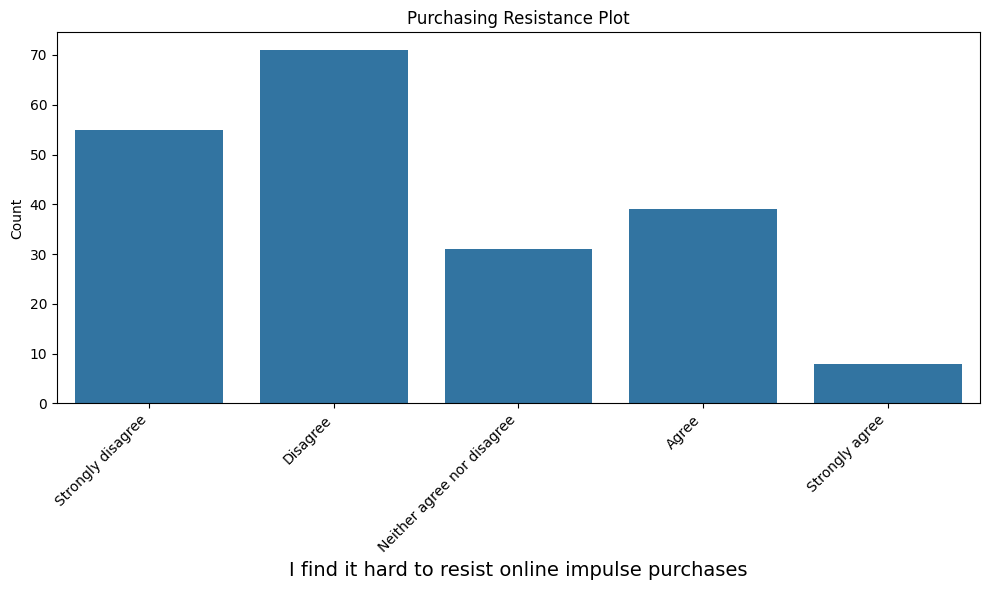

purchasing_resistance
0.25    71
0.0     55
0.75    39
0.5     31
1.0      8
Name: count, dtype: int64

In [15]:
# purchasing resistance

PURCHASING_RESISTANCE_COLUMN = 7
question = df_questions.loc[PURCHASING_RESISTANCE_COLUMN]
options = question["options"]
order = convert_options_to_list(options)
# flip the order
order = order[::-1]
print(order)

# Ensure the survey data is categorical with the same order
survey[str(PURCHASING_RESISTANCE_COLUMN)] = pd.Categorical(
    survey[str(PURCHASING_RESISTANCE_COLUMN)], categories=order, ordered=True
)

# Plot purchasing resistance count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=survey, x=str(PURCHASING_RESISTANCE_COLUMN), order=order)
plt.title("Purchasing Resistance Plot")
plt.xlabel(question["title"], fontsize=14)
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{LOCATION_PROCESSED}/purchasing_resistance_distribution.png")
plt.show()

# convert the column to a linear scale
purchase_resistance_order = {value: i for i, value in enumerate(order)}
survey["purchasing_resistance"] = survey[str(PURCHASING_RESISTANCE_COLUMN)].apply(
    lambda x: purchase_resistance_order[x] / (len(order) - 1)
)

survey["purchasing_resistance"].value_counts()

['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']


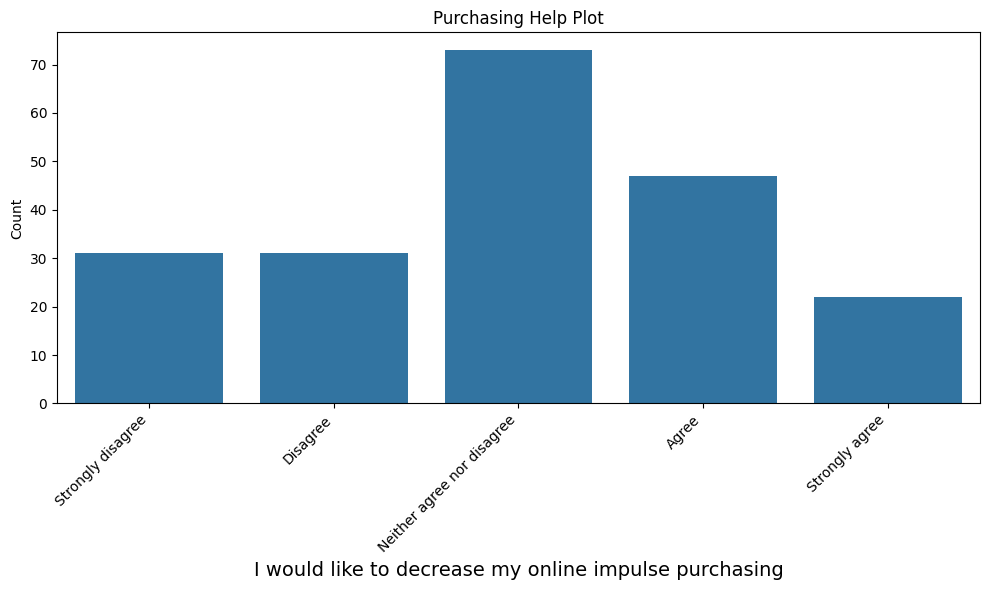

purchasing_help
0.5     73
0.75    47
0.0     31
0.25    31
1.0     22
Name: count, dtype: int64

In [16]:
# purchasing help wanted

PURCHASING_HELP_COLUMN = 8
question = df_questions.loc[PURCHASING_HELP_COLUMN]
options = question["options"]
order = convert_options_to_list(options)
# flip the order
order = order[::-1]
print(order)


# Ensure the survey data is categorical with the same order
survey[str(PURCHASING_HELP_COLUMN)] = pd.Categorical(
    survey[str(PURCHASING_HELP_COLUMN)], categories=order, ordered=True
)

# Plot purchasing help count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=survey, x=str(PURCHASING_HELP_COLUMN), order=order)
plt.title("Purchasing Help Plot")
plt.xlabel(question["title"], fontsize=14)
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{LOCATION_PROCESSED}/purchasing_help_distribution.png")
plt.show()

# convert the column to a linear scale
purchase_help_order = {value: i for i, value in enumerate(order)}
survey["purchasing_help"] = survey[str(PURCHASING_HELP_COLUMN)].apply(
    lambda x: purchase_help_order[x] / (len(order) - 1)
)

survey["purchasing_help"].value_counts()

['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']


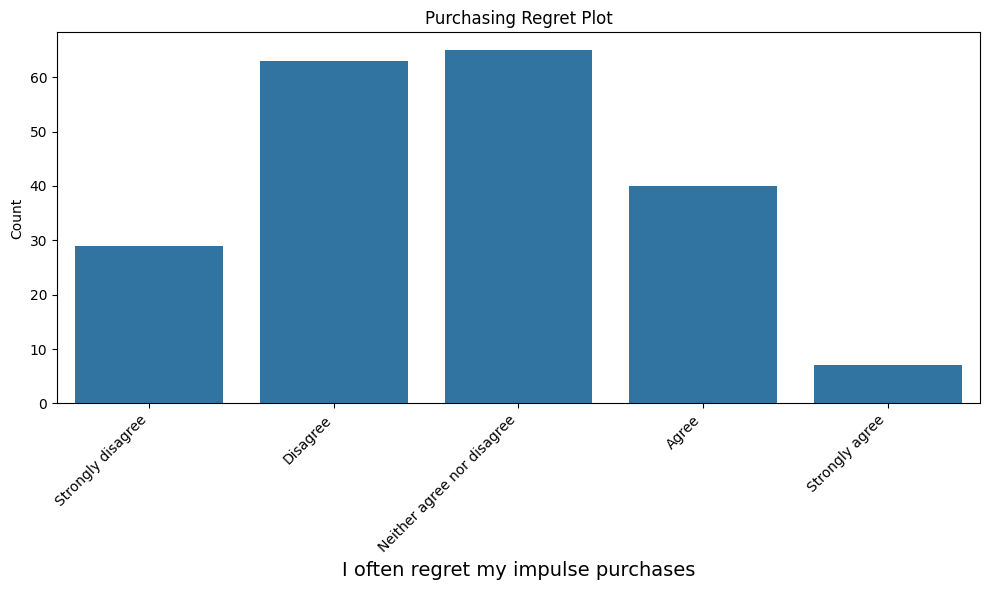

purchasing_regret
0.5     65
0.25    63
0.75    40
0.0     29
1.0      7
Name: count, dtype: int64

In [17]:
# purchasing regret

PURCHASING_REGRET_COLUMN = 9
question = df_questions.loc[PURCHASING_REGRET_COLUMN]
options = question["options"]
order = convert_options_to_list(options)
# flip the order
order = order[::-1]
print(order)

# Ensure the survey data is categorical with the same order
survey[str(PURCHASING_REGRET_COLUMN)] = pd.Categorical(
    survey[str(PURCHASING_REGRET_COLUMN)], categories=order, ordered=True
)

# Plot purchasing regret count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=survey, x=str(PURCHASING_REGRET_COLUMN), order=order)
plt.title("Purchasing Regret Plot")
plt.xlabel(question["title"], fontsize=14)
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{LOCATION_PROCESSED}/purchasing_regret_distribution.png")

plt.show()

# convert the column to a linear scale
purchase_regret_order = {value: i for i, value in enumerate(order)}
survey["purchasing_regret"] = survey[str(PURCHASING_REGRET_COLUMN)].apply(
    lambda x: purchase_regret_order[x] / (len(order) - 1)
)

survey["purchasing_regret"].value_counts()

['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']


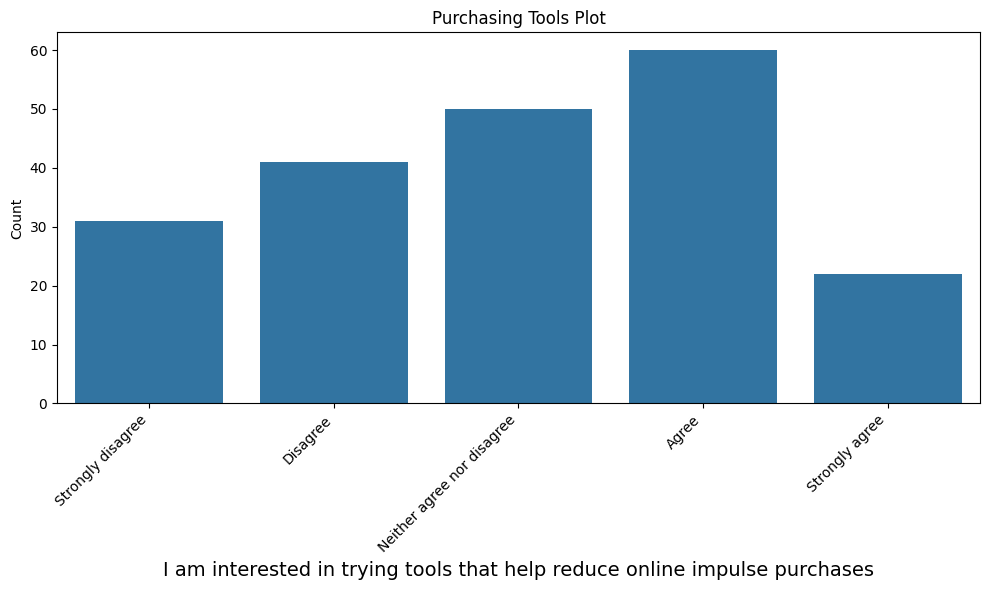

purchasing_tools
0.75    60
0.5     50
0.25    41
0.0     31
1.0     22
Name: count, dtype: int64

In [18]:
# purcahsing tools

PURCHASING_TOOLS_COLUMN = 11
question = df_questions.loc[PURCHASING_TOOLS_COLUMN]
options = question["options"]
order = convert_options_to_list(options)
# flip the order
order = order[::-1]
print(order)

# Ensure the survey data is categorical with the same order
survey[str(PURCHASING_TOOLS_COLUMN)] = pd.Categorical(
    survey[str(PURCHASING_TOOLS_COLUMN)], categories=order, ordered=True
)

# Plot purchasing tools count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=survey, x=str(PURCHASING_TOOLS_COLUMN), order=order)
plt.title("Purchasing Tools Plot")
plt.xlabel(question["title"], fontsize=14)
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{LOCATION_PROCESSED}/purchasing_tools_distribution.png")
plt.show()

# convert the column to a linear scale
purchase_tools_order = {value: i for i, value in enumerate(order)}
survey["purchasing_tools"] = survey[str(PURCHASING_TOOLS_COLUMN)].apply(
    lambda x: purchase_tools_order[x] / (len(order) - 1)
)

survey["purchasing_tools"].value_counts()

In [19]:
# combine purchasing columns into one metric
new_name = "shopaholism"

purchasing_columns = [
    "purchasing_frequency",
    "purchasing_resistance",
    "purchasing_help",
    "purchasing_regret",
    "purchasing_tools",
]

# combine the columns into one using numpy

survey[new_name] = np.mean(
    survey[
        purchasing_columns
    ],
    axis=1,
)
# describe the new column
print(survey[new_name].describe())

# remove the original columns
survey.drop(
    columns=purchasing_columns,
    inplace=True,
)

count    204.000000
mean       0.398856
std        0.215330
min        0.000000
25%        0.245833
50%        0.383333
75%        0.570833
max        0.916667
Name: shopaholism, dtype: float64


['Electronics and Gadgets', 'Clothing and Accessories', 'Health and Beauty Products', 'Home and Garden', 'Food and Beverages', 'Toys and Games', 'Books and Media', 'Sports and Fitness Equipment', 'Travel and Experiences']


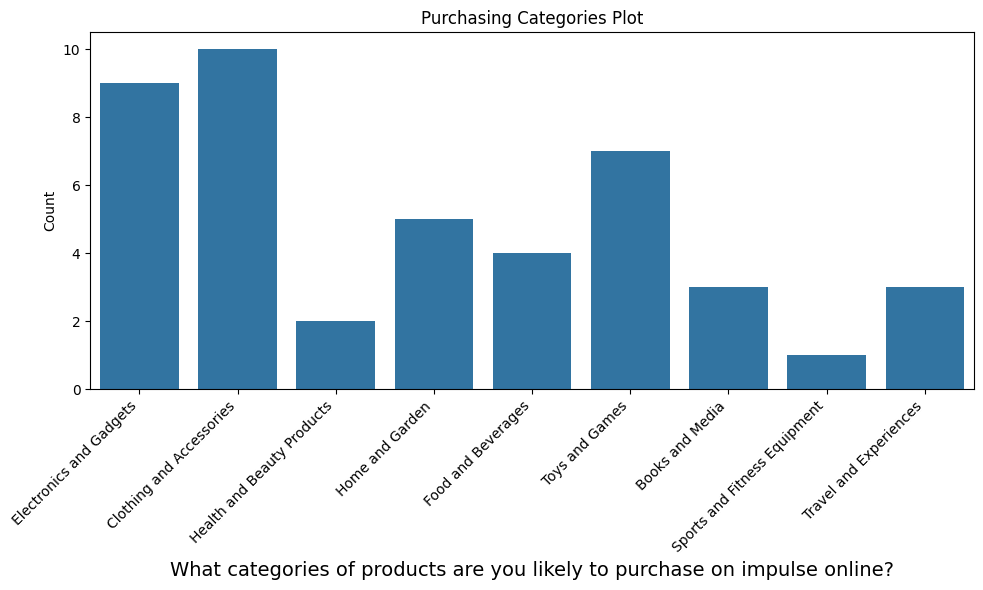

0                                   [Food and Beverages]
1                      [Toys and Games, Books and Media]
2                                                    NaN
3      [Electronics and Gadgets, Toys and Games, Heal...
4      [Electronics and Gadgets, Clothing and Accesso...
                             ...                        
216                            [Electronics and Gadgets]
217    [Clothing and Accessories, Health and Beauty P...
218    [Travel and Experiences, Food and Beverages, C...
219    [Clothing and Accessories, Travel and Experien...
220    [Clothing and Accessories, Health and Beauty P...
Name: purchasing_categories, Length: 204, dtype: object
purchasing_categories
[Clothing and Accessories, Health and Beauty Products]                                                                                                       14
[Clothing and Accessories]                                                                                                             

/Users/adamlass/anaconda3/envs/reddit/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/adamlass/anaconda3/envs/reddit/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,1,2,3,4,5,6,7,8,9,10,...,58,59,60,61,age,femaleness,european,field_technology,shopaholism,category_appearance
0,18-24,Male,Denmark,Undergraduate,Finance / Accounting,Once every three months,Strongly disagree,Agree,Neither agree nor disagree,Food and Beverages,...,Yes,4.0,No,3.0,0.166667,-0.5,1,0,0.433333,0.000000
1,25-34,Female,United States,Part-time Employee,Other,Once every three months,Agree,Strongly agree,Agree,Toys and Games|Books and Media,...,Yes,1.0,No,3.0,0.333333,0.5,0,0,0.633333,0.000000
2,25-34,Male,Denmark,Unemployed,Technology / IT,Rarely / Never,Strongly disagree,Strongly disagree,Strongly disagree,NaN,...,No,3.0,No,3.0,0.333333,-0.5,1,1,0.100000,0.000000
3,25-34,Male,Denmark,Graduate / Postgraduate,Technology / IT,Once a month,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Electronics and Gadgets|Toys and Games|Health ...,...,Maybe,2.0,No,3.0,0.333333,-0.5,1,1,0.466667,0.333333
4,25-34,Male,Finland,Undergraduate,Finance / Accounting,Once every three months,Disagree,Agree,Agree,Electronics and Gadgets|Clothing and Accessories,...,Maybe,3.0,No,3.0,0.333333,-0.5,1,0,0.483333,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,25-34,Male,Denmark,Graduate / Postgraduate,Technology / IT,Rarely / Never,Strongly disagree,Strongly disagree,Strongly disagree,Electronics and Gadgets,...,No,3.0,No,3.0,0.333333,-0.5,1,1,0.100000,0.000000
217,25-34,Female,Denmark,Full-time Employee,Technology / IT,2-3 times a month,Agree,Neither agree nor disagree,Neither agree nor disagree,Clothing and Accessories|Health and Beauty Pro...,...,Yes,4.0,No,NaN,0.333333,0.5,1,1,0.600000,0.666667
218,18-24,Male,Denmark,Undergraduate,Manufacturing / Construction,Once every three months,Disagree,Disagree,Neither agree nor disagree,Travel and Experiences|Food and Beverages|Clot...,...,Yes,5.0,Maybe,3.0,0.166667,-0.5,1,0,0.333333,0.333333
219,25-34,Female,Denmark,Graduate / Postgraduate,Other,Once a month,Neither agree nor disagree,Agree,Disagree,Clothing and Accessories|Travel and Experiences,...,Yes,4.0,Yes,4.0,0.333333,0.5,1,0,0.516667,0.500000


In [20]:
# purchasing categories


PURCHASING_CATEGORIES_COLUMN = 10
question = df_questions.loc[PURCHASING_CATEGORIES_COLUMN]
options = question["options"]
order = convert_options_to_list(options)
# flip the order
print(order)

# Plot purchasing categories count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=survey, x=str(PURCHASING_CATEGORIES_COLUMN), order=order)
plt.title("Purchasing Categories Plot")
plt.xlabel(question["title"], fontsize=14)
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{LOCATION_PROCESSED}/purchasing_categories_distribution.png")
plt.show()

appearance_categories = [
            "Clothing and Accessories",
            "Health and Beauty Products",
            "Home and Garden",
        ]

# # one hot encode the purchasing categories in new columns
survey['purchasing_categories'] = survey[str(PURCHASING_CATEGORIES_COLUMN)].str.split('|')
print(survey['purchasing_categories'])

# put "category_" in front
# survey['purchasing_categories'] = survey['purchasing_categories'].apply(lambda x: [category for category in x] if type(x) == list else [])

print(survey['purchasing_categories'].value_counts())
# map categories not in the list to "Other"
survey['category_appearance'] = survey['purchasing_categories'].apply(lambda x: [(1 if category in appearance_categories else 0) for category in x] if type(x) == list else [])
print(survey['category_appearance'].value_counts())
survey['category_appearance'] = survey['category_appearance'].apply(lambda x: np.average(x) if type(x) == list else 0)
print(survey['category_appearance'].value_counts())

# map NaN to 0
survey['category_appearance'] = survey['category_appearance'].fillna(0)

# df_one_hot = survey['purchasing_categories'].explode().str.get_dummies().groupby(level=0).max()
# print(df_one_hot)
# survey = pd.concat([survey, df_one_hot], axis=1)

# remove the purchasing_categories column
survey.drop(columns=["purchasing_categories"], inplace=True)
survey

In [21]:
all_questions_id = list(df_questions.index)
print(all_questions_id)

# remove columns in survey with the question number indexes
survey = survey.drop(columns=[str(i) for i in all_questions_id])
survey

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


,age,femaleness,european,field_technology,shopaholism,category_appearance
0,0.166667,-0.5,1,0,0.433333,0.000000
1,0.333333,0.5,0,0,0.633333,0.000000
2,0.333333,-0.5,1,1,0.100000,0.000000
3,0.333333,-0.5,1,1,0.466667,0.333333
4,0.333333,-0.5,1,0,0.483333,0.500000
...,...,...,...,...,...,...
216,0.333333,-0.5,1,1,0.100000,0.000000
217,0.333333,0.5,1,1,0.600000,0.666667
218,0.166667,-0.5,1,0,0.333333,0.333333
219,0.333333,0.5,1,0,0.516667,0.500000


In [22]:
# print the columns names
for column in survey.columns:
    print("-"*50)
    # print value counts
    print(survey[column].value_counts())

    # print a new line
    print()

--------------------------------------------------
age
0.333333    98
0.166667    76
0.500000    15
0.666667     8
0.833333     6
1.000000     1
Name: count, dtype: int64

--------------------------------------------------
femaleness
 0.5    97
-0.5    93
 0.0    14
Name: count, dtype: int64

--------------------------------------------------
european
1    127
0     77
Name: count, dtype: int64

--------------------------------------------------
field_technology
0    127
1     77
Name: count, dtype: int64

--------------------------------------------------
shopaholism
0.300000    13
0.200000    12
0.600000    12
0.400000     9
0.000000     8
0.100000     8
0.350000     8
0.150000     8
0.383333     8
0.433333     7
0.283333     6
0.333333     6
0.616667     5
0.650000     5
0.533333     5
0.416667     5
0.250000     5
0.566667     4
0.366667     4
0.516667     4
0.233333     4
0.316667     4
0.133333     4
0.633333     3
0.183333     3
0.666667     3
0.550000     3
0.466667     3
0.483

In [23]:
# save the processed survey data
survey.to_csv(f"{LOCATION_PROCESSED}/survey_features.csv")